# Stoneburner, Kurt #
- DSC 630 - Week 01

## 1. Import, Plot, Summarize, and Save Data ##

**Using the Bureau of Labor Statistics data, choose a dataset that interest you. Then generate summary statistics for 2 variables, plot some of the features (e.g., histograms, box plots, density plots, etc.) of several variables, and save the data locally as CSV files.**

In [1]:

#//*** Data obtained from Bureau of Labor Statistics, County Employment and Wages, 2020
#//*** https://www.bls.gov/cew/downloadable-data-files.htm

#//*** Batch Action: Load File, build dataframes and clean, convert columns to numeric

library(stringr)
library(ggplot2)

#//*** Remove scientific notation
options(scipen = 999)   

#//*** Set Working Directory when working at home
if ( grepl("family", getwd()) ){
setwd("C:\\Users\\family\\DSCProjects\\DSC\\DSC630\\coding")
}
#//*** Verify Working Directory
#getwd()

#//*** Import the CSV data Downloaded from the BLS
raw_df <- read.csv("z_wk01_allhlcn20.csv", header=TRUE,stringsAsFactors=T)

#//*** Build Dataframe of County Data
county_df <- raw_df[raw_df$Ownership == "Total Covered" & raw_df$"Area.Type" == "County", ]

#//*** Build DataFrame of State Totaled Data
state_df <- raw_df[raw_df$Ownership == "Total Covered" & raw_df$"Area.Type" == "State", ]


#//*** Remove un-needed columns
state_df <- state_df[,c(9,14:18) ]


#//*** Convert columns from character to numeric
for (x in colnames(state_df)[2:6]){
#//*** Remove Commas from each column
state_df[x] <- lapply(state_df[x], function(i) gsub(",", "", i) )  

#//*** Convert Column as list to numeric
state_df[x] <- as.numeric(unlist(state_df[x]))
}

#//*** Rename Columns
names(state_df)[1] <- "state"
names(state_df)[2] <- "businesses"
names(state_df)[3] <- "employees"
names(state_df)[4] <- "total.wages"
names(state_df)[5] <- "weekly.pay"
names(state_df)[6] <- "annual.pay"
  
#//*** Save the dataframe as a CSV file
write.csv(state_df,"z_wk01_State_Employ_Wage_2020.csv")                          
#//*** Display the class of each column  
#sapply(state_df, class)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [ ]:
statedf[]

In [2]:
#//*** Display Summary Statistics for: Annual.Average.Employment, Annual.Total.Wages
summary(state_df[c("businesses","annual.pay")])

   businesses        annual.pay    
 Min.   :  22665   Min.   : 43209  
 1st Qu.:  59449   1st Qu.: 51711  
 Median : 132001   Median : 55863  
 Mean   : 205784   Mean   : 59436  
 3rd Qu.: 260639   3rd Qu.: 63509  
 Max.   :1627484   Max.   :107036  

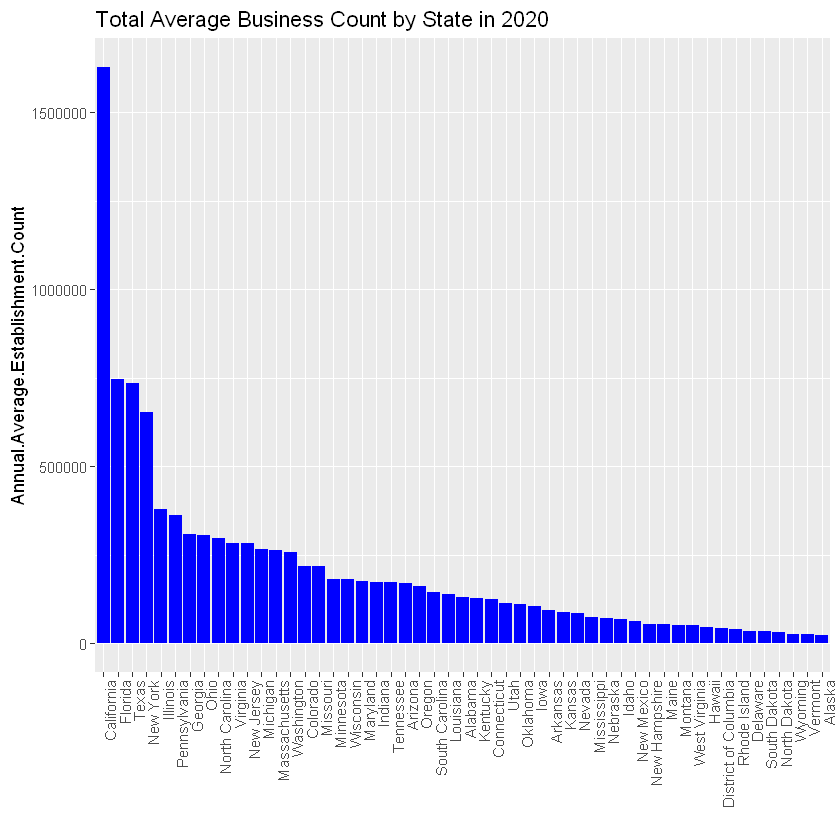

In [3]:

#//*******************************
#//*** Total Business Count
#//*******************************

p_title = "Total Average Business Count by State in 2020"
x_label = ""
y_label = "Annual.Average.Establishment.Count"

#//*** Plot with reorderig the states by descending business value
ggplot(data=state_df, aes(x=reorder(state, -businesses),y=businesses)) +
  
  #//*** Rotate the X text 90 degrees. Makes the State names readable
  theme(axis.text.x = element_text(angle = 90, hjust=1)) +
  
  #//*** Define the X Label
  xlab(x_label) + 
  
  #//*** Define the Y Label
  ylab(y_label) +
  
  #//*** Title
  ggtitle(p_title) +
  
  #//*** Bar Plot based on Identity. Matches the Y value to the X State name
  geom_bar(stat="identity", fill='blue') 


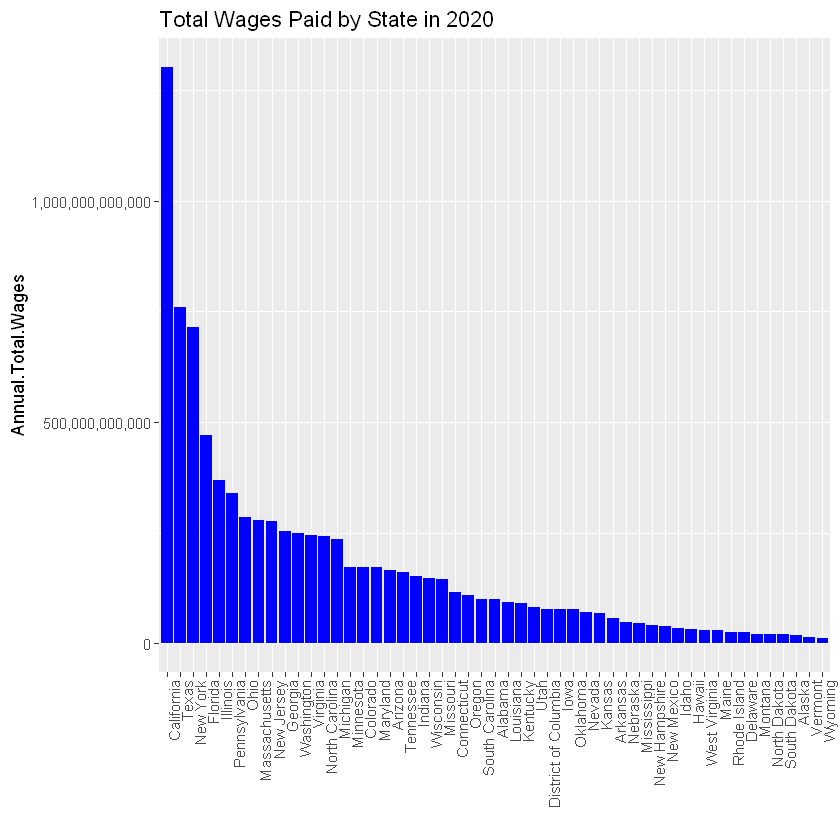

In [4]:
#//*******************************
#//*** Total Wages
#//*******************************

p_title = "Total Wages Paid by State in 2020"
x_label = ""
y_label = "Annual.Total.Wages"

#//*** Plot with reorderig the states by descending business value
ggplot(data=state_df, aes(x=reorder(state, -total.wages),y=total.wages)) +
  
  #//*** Rotate the X text 90 degrees. Makes the State names readable
  theme(axis.text.x = element_text(angle = 90, hjust=1)) +
  
  #//*** Define the X Label
  xlab(x_label) + 
  
  #//*** Define the Y Label
  ylab(y_label) +
  
  scale_y_continuous(labels = scales::comma) + 
  
  #//*** Title
  ggtitle(p_title) +
  
  #//*** Bar Plot based on Identity. Matches the Y value to the X State name
  geom_bar(stat="identity",fill='blue') 

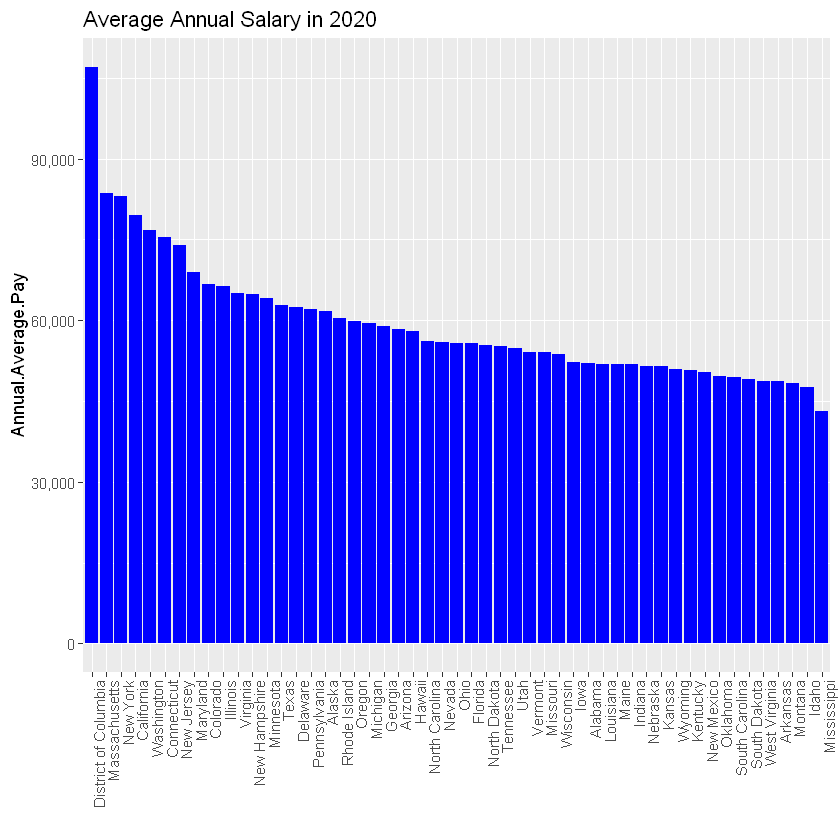

In [5]:
#//*******************************
#//*** Average Annual Pay
#//*******************************
p_title = "Average Annual Salary in 2020"
x_label = ""
y_label = "Annual.Average.Pay"
#//*** Plot with reorderig the states by descending business value
ggplot(data=state_df, aes(x=reorder(state, -annual.pay),y=annual.pay)) +
  
  #//*** Rotate the X text 90 degrees. Makes the State names readable
  theme(axis.text.x = element_text(angle = 90, hjust=1)) +
  
  #//*** Define the X Label
  xlab(x_label) + 
  
  #//*** Define the Y Label
  ylab(y_label) +

  scale_y_continuous(labels = scales::comma) + 
  
  #//*** Title
  ggtitle(p_title) +
  
  #//*** Bar Plot based on Identity. Matches the Y value to the X State name
  geom_bar(stat="identity",fill='blue') 


## 2. Explore Some Bivariate Relations ##

**Use the same dataset within the same website to explore some bivariate relations (e.g. bivariate plot, correlation, table cross table etc.)**

In [12]:
#//*** Table Correlations
cor(state_df[,c(2:6)])

,businesses,employees,total.wages,weekly.pay,annual.pay
businesses,1.0000000,0.9717857,0.9808701,0.3647422,0.3644673
employees,0.9717857,1.0000000,0.9839250,0.3582324,0.3579718
total.wages,0.9808701,0.9839250,1.0000000,0.4438683,0.4436276
weekly.pay,0.3647422,0.3582324,0.4438683,1.0000000,0.9999992
annual.pay,0.3644673,0.3579718,0.4436276,0.9999992,1.0000000


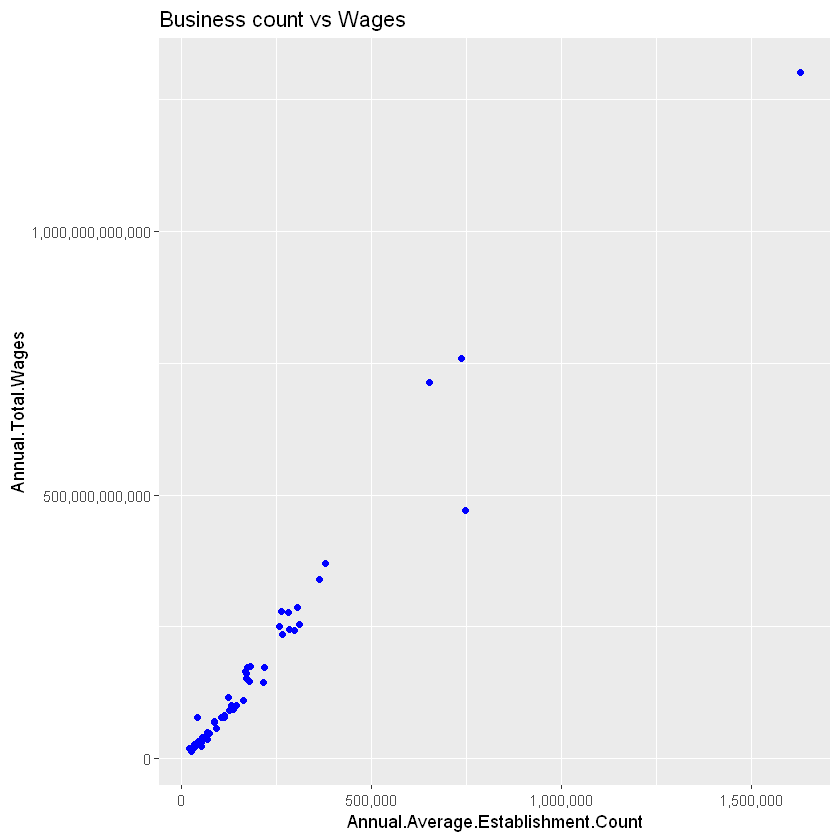

In [7]:
#//******************************************
#//*** Scatter plot Business Count vs Wages
#//******************************************

p_title = "Business count vs Wages"
x_label = "Annual.Average.Establishment.Count"
y_label = "Annual.Total.Wages"

#//*** Plot with reorderig the states by descending business value
ggplot(data=state_df, aes(x=businesses,y=total.wages)) +
  
  #//*** Rotate the X text 90 degrees. Makes the State names readable
  #theme(axis.text.x = element_text(angle = 90, hjust=1)) +
  
  #//*** Define the X Label
  xlab(x_label) + 
  
  #//*** Define the Y Label
  ylab(y_label) +
  
  scale_x_continuous(labels = scales::comma) + 
  
  scale_y_continuous(labels = scales::comma) + 
  
  #//*** Title
  ggtitle(p_title) +
  
  #//*** Bar Plot based on Identity. Matches the Y value to the X State name
  geom_point(stat="identity",color='blue') 

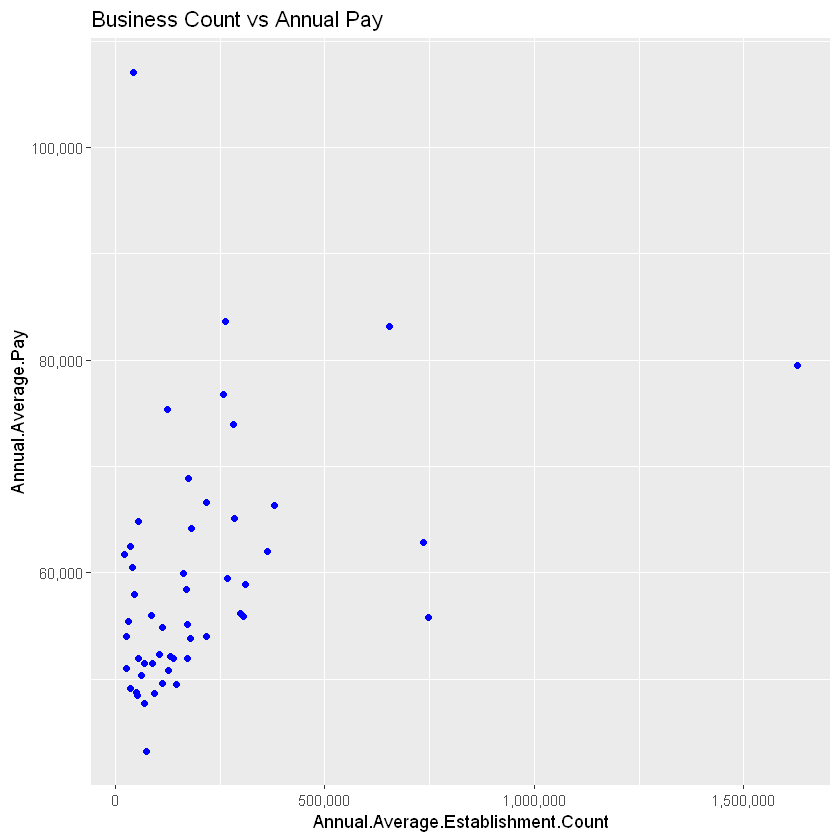

In [16]:
#//******************************************
#//*** Scatter plot Business Count vs Wages
#//******************************************

p_title = "Business Count vs Annual Pay"
x_label = "Annual.Average.Establishment.Count"
y_label = "Annual.Average.Pay"

#//*** Plot with reorderig the states by descending business value
ggplot(data=state_df, aes(x=businesses,y=annual.pay)) +
  
  #//*** Rotate the X text 90 degrees. Makes the State names readable
  #theme(axis.text.x = element_text(angle = 90, hjust=1)) +
  
  #//*** Define the X Label
  xlab(x_label) + 
  
  #//*** Define the Y Label
  ylab(y_label) +
  
  scale_x_continuous(labels = scales::comma) + 
  
  scale_y_continuous(labels = scales::comma) + 
  
  #//*** Title
  ggtitle(p_title) +
  
  #//*** Bar Plot based on Identity. Matches the Y value to the X State name
  geom_point(stat="identity",color='blue') 

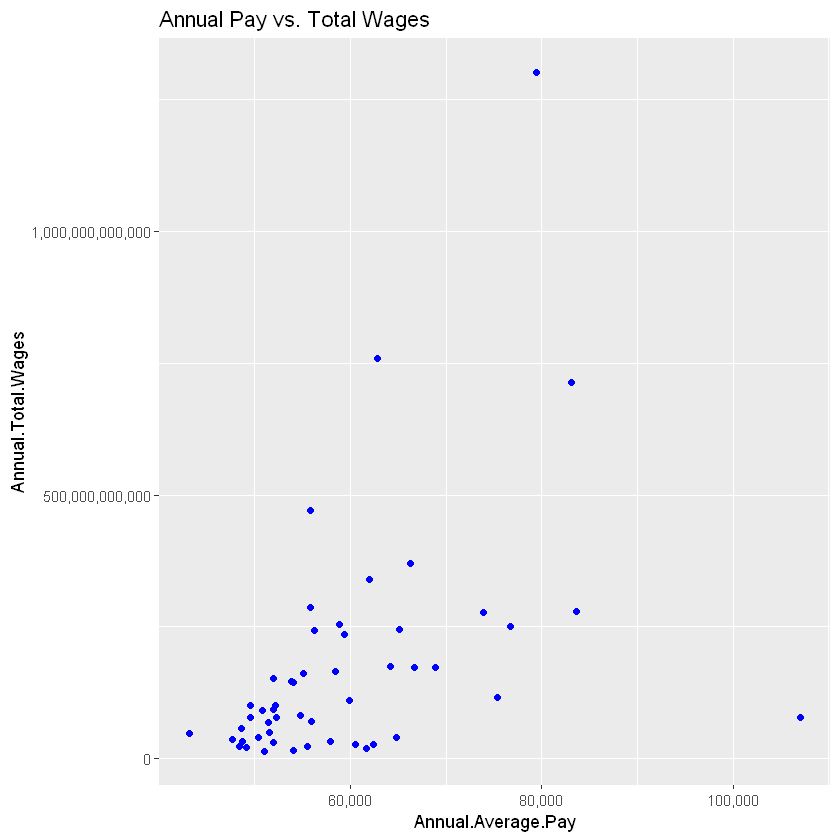

In [9]:
#//******************************************
#//*** Scatter plot Business Count vs Wages
#//******************************************

p_title = "Annual Pay vs. Total Wages"
x_label = "Annual.Average.Pay"
y_label = "Annual.Total.Wages"

#//*** Plot with reorderig the states by descending business value
ggplot(data=state_df, aes(x=annual.pay,y=total.wages)) +
  
  #//*** Rotate the X text 90 degrees. Makes the State names readable
  #theme(axis.text.x = element_text(angle = 90, hjust=1)) +
  
  #//*** Define the X Label
  xlab(x_label) + 
  
  #//*** Define the Y Label
  ylab(y_label) +
  
  scale_x_continuous(labels = scales::comma) + 
  
  scale_y_continuous(labels = scales::comma) + 
  
  #//*** Title
  ggtitle(p_title) +
  
  #//*** Bar Plot based on Identity. Matches the Y value to the X State name
  geom_point(stat="identity",color='blue') 

## 3. Organize a Data Report ##
**Generate a summary report. Make sure to include: summary for every variable, structure and type of data elements, discuss four results of your data.**

The Bureau of Labor Statistics publishes data for County Employment and Wages for 2020. It is a summary of industry type, wages paid, people employed and average salary. These values are represented nationally, statewide and at the county level. 

Business types are broken down by industry:
- Goods Producing, 
- Natural Resources and Mining
- Construction
- Manufactering
- Service Provding
- Trade, Transportation, and Utilities
- Information
- Financial Activities
- Professional and Business Services
- Education and Health Services
- Leisure and Hospitality
- Other Services
- Unclassified

This report looks at the total of all industries combined per state.

The combined industries have the following relevant variables:
- Annual.Average.Establishment.Count: Average total of businesses operating.
- Annual.Average.Employment: Average total of employed individuals.
- Annual.Total.Wages: Total wages paid.
- Annual.Average.Weekly.Wage: Average Worker Weekly Wages.
- Annual.Average.Pay: Average Worker annual pay

#### Initial Results ####
The State of California generates significantly more economic activity than any other state. California had the most businesses (1,627,484) in 2020 which is more than double of the next highest state, Florida with 747,034 employers. California leads the way with over 16 million employed with wages in excess of $1.3 trillion which is significantly greater than any other state.

California ranks 4th in average employee annual income. It is superseded by the District of Columbia, Massachusetts and New York. Although beyond the scope of the data it is hypothsized that annual pay is tightly linked with the high cost of living. Even though he San Francisco Bay Area has the highest cost of living in the country (which is why I still cannot afford a house), California is a large state with significant geographic and cost of living diversity. Being a larger state makes it easier for the population to shift from higher cost of living areas to cheaper ones. This is much more difficult in the smaller east coast states (with the exception of New York).

The total number of business in a state is tightly correlated with the total number of employees (.97) and total wages paid (.98). This makes sense. As the number of businesses increases, the number of employed is expected to increase. Employees don't work for free, so wages should naturally increase.

The relationship between total wages paid and average worker annual is weaker than expected at .44 . This hints that wages and economic activity are not evenly distributed across the state. The District of Columbia has the highest pay per employee coupled with a low population. Since it is the seat of the Federal government it would be interesting to look at difference between public and private sector pay in the District of Columbia.

In [11]:
#//*** Display last error
#rlang::last_error()